<a name='0'></a>

# Fundamentals of Image Processing

### What's in here: 

* [1. Intro to Image Processing](#1)
* [2. Image Color Channels](#2)
* [3. Image Color Spaces Conversion](#3)
* [4. Image Adjustments](#4)
* [5. Geometric Transformation: Resizing, Cropping, Flipping, Rotating, Transposing](#5)
* [6. Image Kernels and Convolution](#6)
* [7. Drawing Bounding Boxes On Image](#7)
* [8. Image Histograms and Histograms Equalization](#8)

<a name='1'></a>
## 1. Intro to Image Processing

Image processing is a fundamental step in most computer vision applications. It involves preparing or processing the image to be in the form suitable for analysis. 

In this introduction, we will learn some classical method for processing images and also peep into other techniques such as convolution. 

Let's import tools that we will need along the way. [scikit-image](https://scikit-image.org) for basic image processing and sample images, [OpenCV](https://opencv.org) for also image processing, TensorFlow(we will only use [tf.image](https://www.tensorflow.org/api_docs/python/tf/image) here), and [Matplotlib](https://matplotlib.org/stable/index.html) for  plotting the images. 

In the later parts, we will be using TensorFlow for image recognition tasks but as this notebook is purely basic image processing, we will use these basic tools quite often. 

In [ ]:
import skimage
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

<a name='2'></a>

## 2. Image Color Channels

Any color image is typically made of 3 main color channels which stands for Red, Green, and Blue(RGB) while a grayscale image is made of 1 single channel.

We can extract any single color from the image by making other color channels 0.

Let's try that for a given image. We will use `astronaut Eileen Collins` image from [scikit-image data samples](https://scikit-image.org/docs/stable/api/skimage.data.html). 



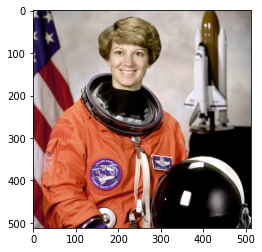

In [ ]:
from skimage import data

sample_image = data.astronaut()
plt.imshow(sample_image)

In order to extract a single color channel from the image, we have to set the other channels to 0. So, for example, if we want to extract red, we have to set blue and green to zero. 

Let's see that below, but, it is also important to note that the shape of image is made of( `height`, `width`, `channel`). The channel is what we set to zero. 

In [ ]:
sample_image.shape

(512, 512, 3)

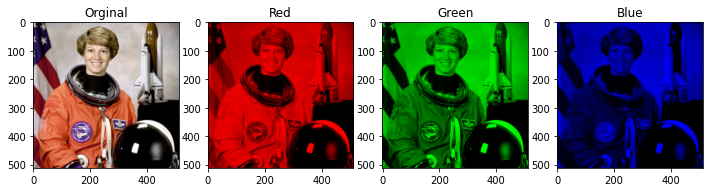

In [ ]:
red_copy = sample_image.copy()

# Set red and blue channels to 0

red_copy[:,:,1] = 0
red_copy[:,:,2] = 0


green_copy = sample_image.copy()

# Set red and blue channels to 0

green_copy[:,:,0] = 0
green_copy[:,:,2] = 0


blue_copy = sample_image.copy()

# Set red and blue channels to 0

blue_copy[:,:,0] = 0
blue_copy[:,:,1] = 0

# Plot the results

plt.figure(figsize=(12,12))

plt.subplot(1,4,1)
plt.imshow(sample_image)
plt.title('Orginal')

plt.subplot(1,4,2)
plt.imshow(red_copy)
plt.title('Red')

plt.subplot(1,4,3)
plt.imshow(green_copy)
plt.title('Green')

plt.subplot(1,4,4)
plt.imshow(blue_copy)
plt.title('Blue');

Another interesting thing to do is to only zero one single color. That will leave an image of two colors. 

So, if we set blue to zero for example, the mixture of red and green will produce yellow. This is from the principle of color mixture. 

![colors](https://drive.google.com/uc?export=view&id=1mOo9RX11lSqxTIqgKD47L_kun_XOwLE_)


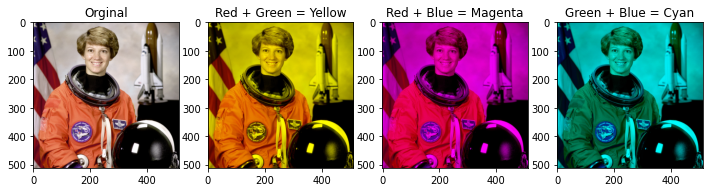

In [ ]:
# Set blue to 0
red_green = sample_image.copy()
red_green[:,:,2] = 0

# Set green to 0

red_blue = sample_image.copy()
red_blue[:,:,1] = 0

# Set red to 0
green_blue = sample_image.copy()
green_blue[:,:,0] = 0

# Plot the results

plt.figure(figsize=(12,12))

plt.subplot(1,4,1)
plt.imshow(sample_image)
plt.title('Orginal')

plt.subplot(1,4,2)
plt.imshow(red_green)
plt.title('Red + Green = Yellow')

plt.subplot(1,4,3)
plt.imshow(red_blue)
plt.title('Red + Blue = Magenta')

plt.subplot(1,4,4)
plt.imshow(green_blue)
plt.title('Green + Blue = Cyan');

There are also other image colorspaces. In the next section, we will see them and learn how to convert one color space to another.

<a name='3'></a>

## 3. Image Color Spaces Conversion

There are many color spaces or models but the most commonly used are [RGB](https://en.wikipedia.org/wiki/RGB_color_model)(that we saw above), grascale, and [HSV](https://en.wikipedia.org/wiki/HSL_and_HSV#HSV_to_RGB)(hue, saturation, value or lightness). 

RGB describes colors in amount of red, green and blue and is suitable for monitors and displays, [grayscale](https://en.wikipedia.org/wiki/Grayscale#Colorimetric_.28luminance-preserving.29_conversion_to_grayscale) carries the intensinty information(also referred to as black and white), and HSV color space describes colors in terms of the Hue, Saturation, and Value. HSV is well perceived by humans and it is preferred in situations where color description plays an important role in analysis. 

Nearly all image processing tools we introduced above contain the functions for converting image from one color spaces to another. 

The choice of tool depend on the application and its depth. For example, if you are using TensorFlow to build a computer vision application, using `tf.image` for image processing can be much better than using other tools since it will play well with other TF functions required for building such application.

Let's use TensorFlow `tf.image` to convert the orginal image to `grayscale` and `hsv`. 

In [ ]:
# Convert the image to grascale

sample_image = sample_image/255.0

grayscale = tf.image.rgb_to_grayscale(sample_image)
print(f'The shape of the grayscale image: {grayscale.shape}')

The shape of the grayscale image: (512, 512, 1)


`plt.imshow()` that we are using can't display the image of such shape. We need to remove the dimension of 1 so we remain with (512,512). We can use [tf.squeeze()](https://www.tensorflow.org/api_docs/python/tf/squeeze) to do that. 

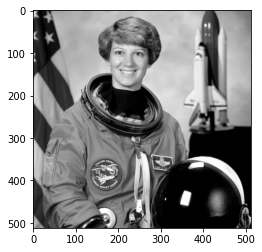

In [ ]:
# Removing the axis of 1 in (512, 512) with tf.squeeze() or np.squeeze()

gray = tf.squeeze(grayscale, axis=2)
plt.imshow(gray, cmap='gray')

It is possible to convert the image back from the grayscale to rgb. Just use [`tf.image.grayscale_to_rgb`](https://www.tensorflow.org/api_docs/python/tf/image/grayscale_to_rgb). 

We can also convert the image to HSV. 

In [ ]:
hsv = tf.image.rgb_to_hsv(sample_image)

print(f'The shape of the grayscale image: {hsv.shape}')

The shape of the grayscale image: (512, 512, 3)


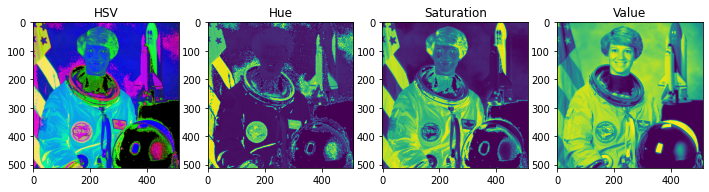

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(hsv)
plt.title('HSV')

labels = ['Hue', 'Saturation', 'Value']

index = 2
for i in range(3):

  plt.subplot(1,4,index)
  plt.imshow(hsv[:,:,i])
  plt.title(labels[i])
  index += 1

Another color model that we can wrap up this section with is YUV. Just like HSV, YUV takes into account the human perception. Y stands for luminance/brightness, U and V are chrominance components. U projects blue, while V projects red. You can read more about YUV [here](https://en.wikipedia.org/wiki/YUV). 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


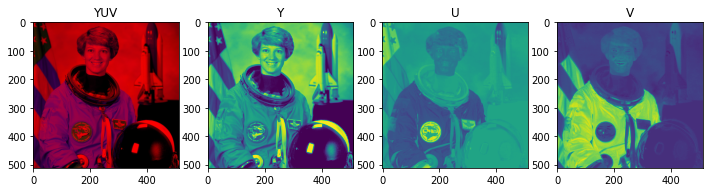

In [ ]:
yuv = tf.image.rgb_to_yuv(sample_image)

plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(yuv)
plt.title('YUV')

labels = ['Y', 'U', 'V']

index = 2
for i in range(3):

  plt.subplot(1,4,index)
  plt.imshow(yuv[:,:,i])
  plt.title(labels[i])
  index += 1

In practice, machine learning and modern computer vision models such as convolutional neural networks use RGB images and they don't require us to convert RGB into other color spaces because they can discover or extract the information in the images on their own.

<a name='4'></a>

### 4. Image Adjustments

Image can be adjusted in various ways. We can increase or reduce the brightness, contrast, hue and saturation. Image adjustments is a key feature in image processing softwares like Photoshop because it includes different set of operations that can be used to enhance images, correct color, and improve the brightness. 

In order to adjust the brightness for example, we have to multiply the pixels in the image by a given scalar bigger than 1(given that the pixels values are between 0 and 1), and multiply the pixels with a scalar less than 1 to make image darker. To make it simple, the higher the pixel values, the brighter the image, and the lower the pixel values, the darker the image. 

Why are we studying image adjustments when we are not going to edit images in Photoshop? Well, image adjustments can also be used in image data augmentation where you can expand the training images by adjusting the existing images. You can adjust colors, contrast, saturation, etc...Image augmentation is a sure technique that is used to reduce overfitting. We will see that later but overfitting is one of the biggest challenge in training machine learning and computer vision models that is caused by lack of enough data or poor diversity in data. 

There are a lot of maths involved in image adjustements techniques, but the good news is that we can adjust images easily with tools we are already using. They nearly all provides image adjustments techniques. 

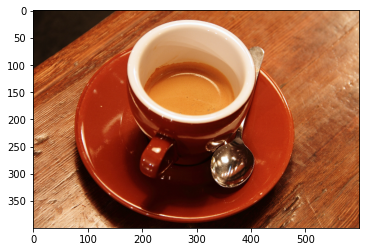

In [ ]:
coffee_mug = data.coffee()

plt.imshow(coffee_mug)

The pixels of coffee mug range from 0 to 255. Let's divide it by 255 to convert the image pixels to the values between 0 and 1. 

In [ ]:
print(f'The minimum pixel value: {coffee_mug.min()} \nThe maximum pixel value: {coffee_mug.max()}')

The minimum pixel value: 0 
The maximum pixel value: 255


In [ ]:
coffee_mug = coffee_mug / 255.0

print(f'The new minimum pixel value: {coffee_mug.min()} \nThe new maximum pixel value: {coffee_mug.max()}')

The new minimum pixel value: 0.0 
The new maximum pixel value: 1.0


Let's start with adjusting the brightness using [tf.image.adjust_brightness](https://www.tensorflow.org/api_docs/python/tf/image/adjust_brightness). `delta` denotes the amount we want to add to the pixel values. If the image pixels are between 0 and 1, `delta` should be between -1 and 1. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


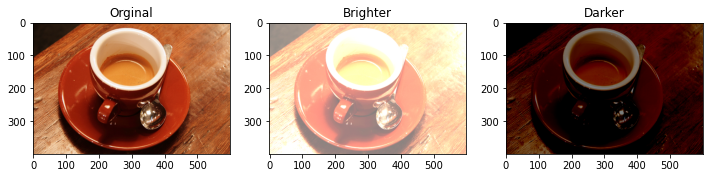

In [ ]:
brighter = tf.image.adjust_brightness(coffee_mug, delta=0.5)
darker = tf.image.adjust_brightness(coffee_mug, delta=-0.5)


plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.imshow(coffee_mug)
plt.title('Orginal')

plt.subplot(1,3,2)
plt.imshow(brighter)
plt.title('Brighter')

plt.subplot(1,3,3)
plt.imshow(darker)
plt.title('Darker');

We can also use `tf.image.adjust_saturation` to adjust the contrast. 

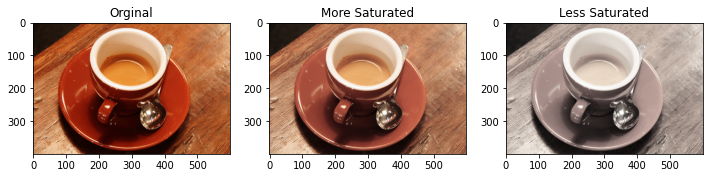

In [ ]:
more_saturated = tf.image.adjust_saturation(coffee_mug, 0.7)
less_saturated = tf.image.adjust_saturation(coffee_mug, 0.2)

plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.imshow(coffee_mug)
plt.title('Orginal')

plt.subplot(1,3,2)
plt.imshow(more_saturated)
plt.title('More Saturated')

plt.subplot(1,3,3)
plt.imshow(less_saturated)
plt.title('Less Saturated');

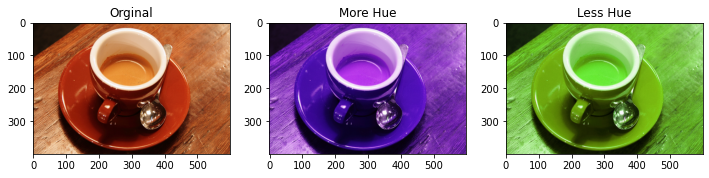

In [ ]:
more_hue = tf.image.adjust_hue(coffee_mug, 0.7)
less_hue = tf.image.adjust_hue(coffee_mug, 0.2)

plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.imshow(coffee_mug)
plt.title('Orginal')

plt.subplot(1,3,2)
plt.imshow(more_hue)
plt.title('More Hue')

plt.subplot(1,3,3)
plt.imshow(less_hue)
plt.title('Less Hue');

TensorFlow also provides random adjustment techniques.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


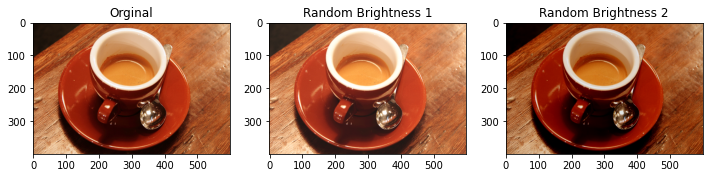

In [ ]:
random_1 = tf.image.random_brightness(coffee_mug, max_delta=0.7)
random_2 = tf.image.random_brightness(coffee_mug, max_delta=0.2)


plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.imshow(coffee_mug)
plt.title('Orginal')

plt.subplot(1,3,2)
plt.imshow(random_1)
plt.title('Random Brightness 1')

plt.subplot(1,3,3)
plt.imshow(random_2)
plt.title('Random Brightness 2');

You can explore more other adjustments techniques on [tf.image](https://www.tensorflow.org/api_docs/python/tf/image) documentation page. 

<a name='5'></a>

## 5. Geometric Transformation: Resizing, Cropping, Flipping, Rotating, Transposing

When working with images, it is a usual thing to need transforming the image in some forms. For example, most machine learning and computer vision algorithms accept the images tha have the same size, so it becomes important to always remember resizing images especially if their sizes are already different. 


That was one example. There are more other examples where transforming images is very helfpul such as in image data augmentation. We can expand the size of the training images by cropping, rotating and flipping the existing images. 

Let's start seeing how to resize the image. 



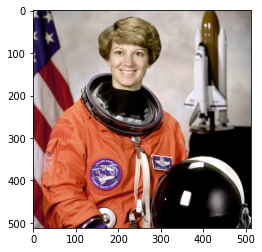

In [ ]:
astronaut = data.astronaut()

plt.imshow(astronaut)

Let's check the shape of the image

In [ ]:
astronaut.shape

(512, 512, 3)

We can use `tf.image.resize(images, size, method=ResizeMethod.BILINEAR)` to resize the images to (new) size. The method arguments allows you to choose a given method. See the available methods[here](https://www.tensorflow.org/api_docs/python/tf/image/ResizeMethod).

In [ ]:
resized_image = tf.image.resize(astronaut, [500,500])
resized_image.shape

TensorShape([500, 500, 3])

`tf.image` has other resize options such as [tf.image.resize_with_pad](https://www.tensorflow.org/api_docs/python/tf/image/resize_with_pad) and [tf.image.resize_with_crop_or_pad](https://www.tensorflow.org/api_docs/python/tf/image/resize_with_crop_or_pad). 

Another useful technique in image processing is cropping the image where we can remove the unnecessary parts or change the aspect ratio of the image. 

In [ ]:
cropped_image = tf.image.central_crop(astronaut, 0.5) # 0.5 denotes the size to crop. It is a float between 0 and 1
cropped_image.shape

TensorShape([256, 256, 3])

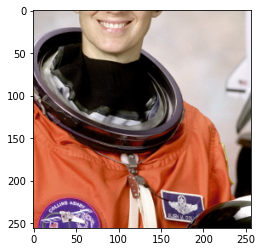

In [ ]:
plt.imshow(cropped_image)

Let's increase the crop size a little bit. 

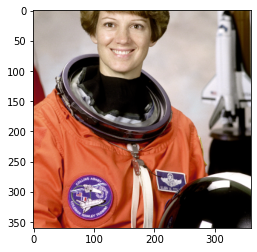

In [ ]:
plt.imshow(tf.image.central_crop(astronaut, 0.7))

Also, tf.image contains other numerous functions for cropping images such as:

* [tf.image.crop_and_resize](https://www.tensorflow.org/api_docs/python/tf/image/crop_and_resize)
* [tf.image.crop_to_bounding_box](https://www.tensorflow.org/api_docs/python/tf/image/crop_to_bounding_box)
* [tf.io.decode_and_crop_jpeg](https://www.tensorflow.org/api_docs/python/tf/io/decode_and_crop_jpeg)
* [tf.image.random_crop](https://www.tensorflow.org/api_docs/python/tf/image/random_crop)
* [tf.image.resize_with_crop_or_pad](https://www.tensorflow.org/api_docs/python/tf/image/resize_with_crop_or_pad).

The third transformation technique is flipping. So, we can take an image, flip it horizontally or vertically, or randomly between these two. 

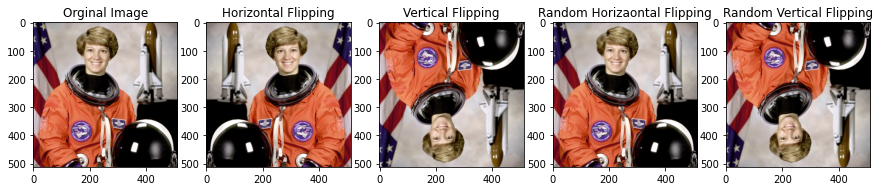

In [ ]:
flip_horiz = tf.image.flip_left_right(astronaut)
flip_vert = tf.image.flip_up_down(astronaut)
flip_random_horiz = tf.image.random_flip_left_right(astronaut, seed=42)
flip_random_vert = tf.image.random_flip_up_down(astronaut, seed=42)

plots = [astronaut, flip_horiz, flip_vert, flip_random_horiz, flip_random_vert]
plot_names = ['Orginal Image', 'Horizontal Flipping', 'Vertical Flipping', 'Random Horizaontal Flipping', 'Random Vertical Flipping']

plt.figure(figsize=(15,15))

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(plots[i]);
  plt.title(plot_names[i])
  

The last thing to see in this section is image rotation. We can take an image and rotate it at a given degree. 

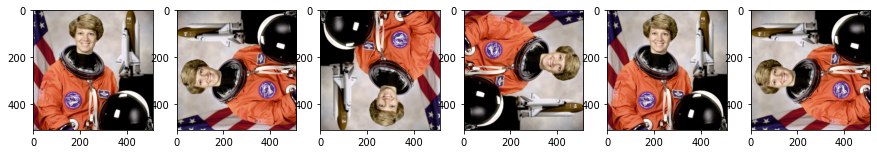

In [ ]:
degree_factor = [0,1,2,3,4,5]


plt.figure(figsize=(15,15))
for i in range(6):
  rotate = tf.image.rot90(astronaut, k=degree_factor[i])
  plt.subplot(1,6,i+1)
  plt.imshow(rotate)

As you can see above, the argument `k` is an integer that is multiplied 90 degrees. 

That's it for image geometric transformations. Let's move to image kernels and convolutions which is one of the important thing to know in image processing and computer vision in general. 

<a name='6'></a>

## 6. Convolution and Image Kernels

Convolution is a technique of sliding the filters over the image to extract the features or highlight the most important parts of the image. 

Image kernel or filter is a small matrix that is applied to image. There are many types of filters such as blurring, sharpening, and edge filters. Convolution is the main building block of image processing softwares such as Photoshop and most social platforms (like Instagram, Snapshot, WhatsApp) that allows users to apply effects to their images before they upload them. 

Convolution is also used in feature extraction in convolutional neural networks or CNNs. More on CNNs later. 

Here is the process of the convolution: The filter of a given size(say 3X3) is slided over each pixel of the image where the center value of filter is at such particular pixel, we multiply the corresponding image pixel and filter values or weights, compute the sum, and such sum makes the new pixel. We repeat the process until the filter is slid over all image pixels.

Here is a great illustration of the convolutional process that is borrowed from [here](https://www.cs.virginia.edu/~vicente/recognition/notebooks/image_processing_lab.html). 

![conv](https://www.cs.virginia.edu/~vicente/recognition/notebooks/animation.gif)

Most image processing tools such as TensorFlow, PIL and OpenCV implements convolution. Let's use [`tf.keras.layers.Conv2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) to practice convolution. 

Text(0.5, 1.0, 'After Convolution')

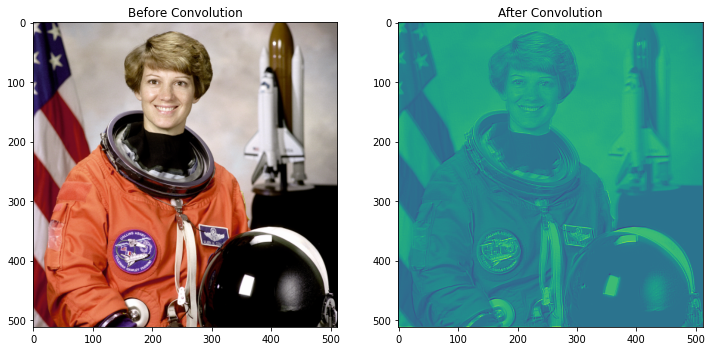

In [ ]:
# Convert the image to tensor
image = tf.constant(astronaut, dtype=tf.float32)

# Expand the image dimension to (1,512,512,3)
image = tf.expand_dims(image, axis=0)

# Use filter of 1, size of 3 by 3
output = tf.keras.layers.Conv2D(1, 3, strides=1,padding='same')(image)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(astronaut)
plt.title('Before Convolution')

plt.subplot(1,2,2)
plt.imshow(tf.squeeze(output))
plt.title('After Convolution')

`tf.keras.layers.Conv2D` randomly selects filters. In our case, we used 1 filters but usually when using CNNs in practice, we may use many more than 1 filters. We will see that in later notebooks.

If you want to see what's it's like with using filters of your choice, we can try that with other OpenCV.

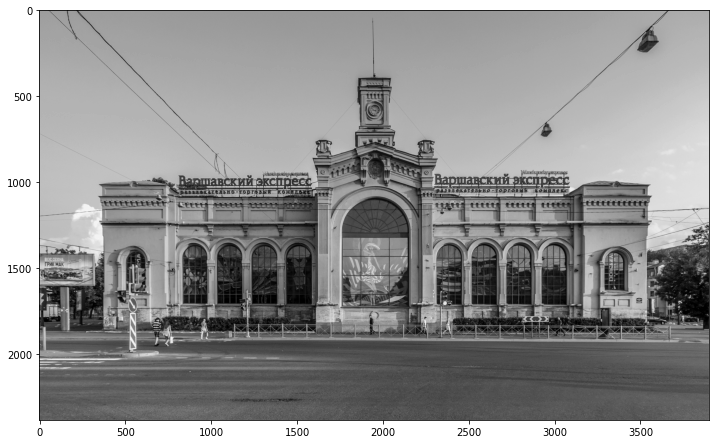

In [ ]:
from skimage import io

image_url = 'https://upload.wikimedia.org/wikipedia/commons/7/73/Varshavsky_Rail_Terminal_SPB.jpg'

image = io.imread(image_url)

# Convert image to gray scale...Could also read image above as image = io.imread(image_url, as_gray=True)  
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12,10))
plt.imshow(image, cmap='gray')

Let's make a function so we can easily experiment with many types of filters.

In [ ]:
def apply_filter(image, filter):
  '''
  Take image and filter
  Apply filter to image
  Plot both the orginal image and the filterd image
  '''

  filtered_image = cv2.filter2D(image, ddepth=-1, kernel=filter)

  # Plot the image
  plt.figure(figsize=(12,10))
  plt.subplot(1,2,1)
  plt.imshow(image, cmap='gray')
  plt.title("Orginal image")

  plt.subplot(1,2,2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title("Filter Applied")


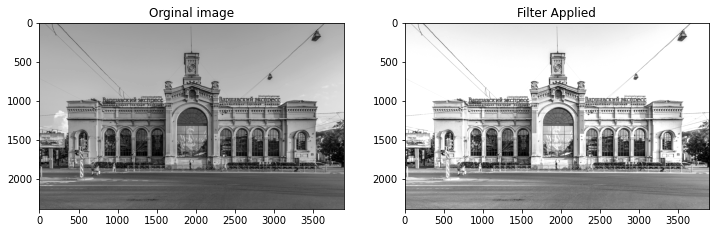

In [ ]:
sharpen = np.array([[0, -1, 0], 
                    [-1, 5.5, -1], 
                    [0, -1, 0]])

apply_filter(image, sharpen)

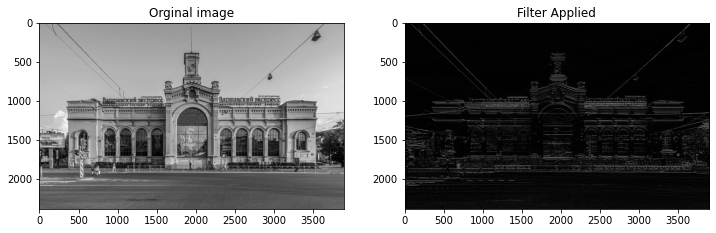

In [ ]:
edge_filter = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

apply_filter(image, edge_filter)

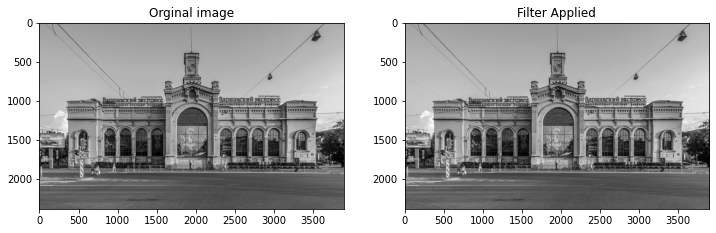

In [ ]:
blur = np.array([[0.0625, 0.0625, 0.0625],
                   [0.0625, 0.0625, 0.0625],
                   [0.0625, 0.0625, 0.0625]])

apply_filter(image, blur)

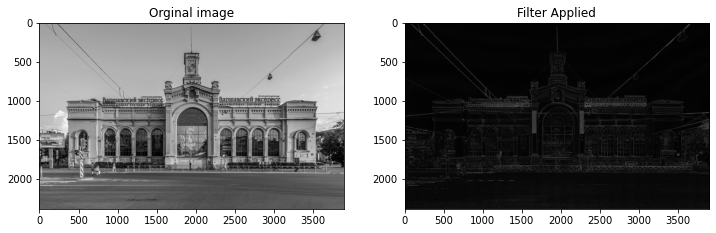

In [ ]:
outline = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

apply_filter(image, outline)

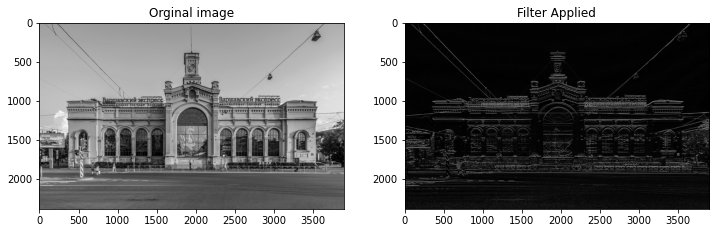

In [ ]:
top_sobel = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

apply_filter(image, top_sobel)

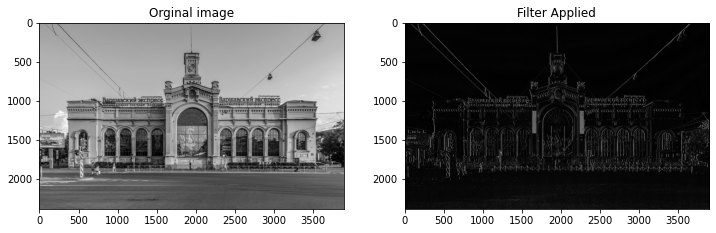

In [ ]:
right_sobel = np.array([[1.0, 0.0, -1.0],
                        [2.0, 0.0, -2.0],
                        [1.0, 0.0, -1.0]])


apply_filter(image, right_sobel)

OpenCV and other image processing tools possesses the filtering functions that are already implemented. Let's implement some filters with OpenCV below.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


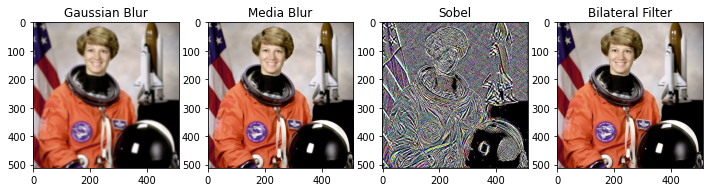

In [ ]:
im_copy = astronaut.copy()

gaussian_blur = cv2.GaussianBlur(im_copy, (11, 11), 0) 
median_blue = cv2.medianBlur(im_copy, ksize=5)
sobel = cv2.Sobel(im_copy, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)
bilat_filter = cv2.bilateralFilter(im_copy, d=9, sigmaColor=75, sigmaSpace=75)

filters = [gaussian_blur, median_blue, sobel, bilat_filter]
titles = ['Gaussian Blur', 'Media Blur', 'Sobel', 'Bilateral Filter']

plt.figure(figsize=(12,10))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(filters[i]);
  plt.title(titles[i])

<a name='7'></a>

## 7. Drawing on Images: Bounding Boxes and Other Things

Drawing on the image is perhaps one of the other importants image processing techniques. In computer vision, when working on object detection algorithms, for example, we draw the bounding boxes on the detected objects. 

Most object detection tools or API such as [detectron](https://github.com/facebookresearch/detectron2/tree/main/projects) in PyTorch and [Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection) in TensorFlow can do that for us or provides functions for drawing bounding boxes easily. 

Let's use [`tf.image.draw_bounding_boxes`](https://www.tensorflow.org/api_docs/python/tf/image/draw_bounding_boxes) to see how to draw bounding boxes on image.

In [ ]:
boxes = np.array([0.03, 0.2, 0.48, 0.7]) # [y_min, x_min, y_max, x_max] and are floats betweem 0.0 and 1.0
boxes = boxes.reshape([1, 1, 4])

image = tf.expand_dims(astronaut, axis=0)  #[1,512,512]
image = tf.cast(image, dtype=tf.float32) # convert image pixels to float

colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 0.0]])

# Drawing the boxes on the image

image_boxes = tf.image.draw_bounding_boxes(image, boxes, colors)

# Removing the axis 1
image_boxes = tf.squeeze(image_boxes, axis=0)

# Cnverting the image pixels back to int 
image_boxes = tf.cast(image_boxes, dtype=tf.uint32)

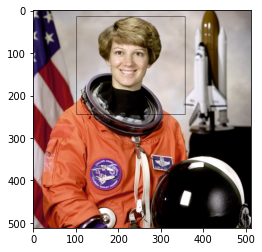

In [ ]:
plt.imshow(image_boxes)

You can check more related bounding boxes functions on [tf.image](https://www.tensorflow.org/api_docs/python/tf/image#working_with_bounding_boxes) documentation page. 

OpenCV has a wide range of functions for drawing on the images. Let's use `cv2.rectangle()` for drawing the rectangle across the face in the image just like above. 

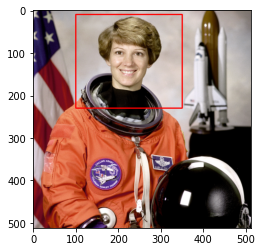

In [ ]:
im_copy = astronaut.copy()

# The bottom coordinates (x,y)

start_point = (100, 230)

# The top coordinates (x,y)
end_point = (350,10)

# Color: Red (255,0,0)
color = (255,0,0) 

# The thickness of the rectangle
thickness = 2

rectangle_on_face = cv2.rectangle(im_copy, start_point, end_point, color, thickness)
plt.imshow(rectangle_on_face)

We can also add texts on the image using  `cv2.putText()`.

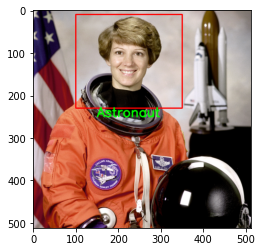

In [ ]:
font_scale = 1
coordinates = (150, 250)
color = (0,255, 0)
font = cv2.FONT_HERSHEY_SIMPLEX
text = 'Astronaut'


text_on_image = cv2.putText(im_copy, text, coordinates, font, font_scale, 
                 color, thickness, cv2.LINE_AA, False)
plt.imshow(text_on_image)

<a name='8'></a>

## 8. Image Histograms and Histograms Equalization

Image histograms are used to represent the intensity of the pixels in the image. 

Image histograms are used for image analysis because they can allow you to spot the darker or brighter pixels. They are also used in image segmentation from a technique called [thresholding](https://en.wikipedia.org/wiki/Thresholding_(image_processing). Thresholding is the simplest method of segmenting images.

As we will also see, image histograms are used for histograms equalization. 

In a typical image histogram representation, the x axis shows the pixels intensities, and the y axis shows the frequency of these intensities. 

We can simply plot the image histograms with matplolib. 

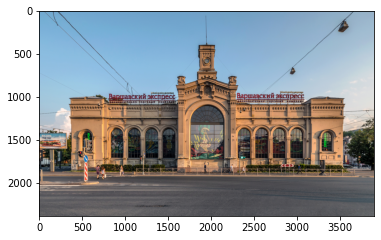

In [ ]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/7/73/Varshavsky_Rail_Terminal_SPB.jpg'

image = io.imread(image_url)
plt.imshow(image)

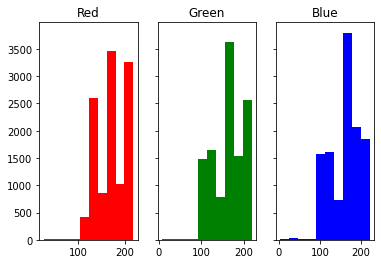

In [ ]:
red_image = image[0]
green_image = image[1]
blue_image = image[2]

# Plot the histograms with matplolib

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True)
ax1.hist(red_image.ravel(), color='r')
ax1.set_title('Red')
ax2.hist(green_image.ravel(), color='g')
ax2.set_title('Green')
ax3.hist(blue_image.ravel(), color='b')
ax3.set_title('Blue')
fig.show()

OpenCV also has a function `cv2.calcHist` for calculating the image histograms.

Here are the details about the above function:

```
cv2.calcHist(images, channels, mask, histSize, ranges)
```
```
images: Image of type uint8 or float32 provided in square bracket.
channels: Represents the index of the channel. It is also given in square bracket. For grayscale images, the channel is [0].
mask: Represents a mask image. To find the histogram of the full image, the mask should be "None".
histSize: Represents the number of bins provided as a list.
ranges: Represents the range of intensity or pixel values.
```

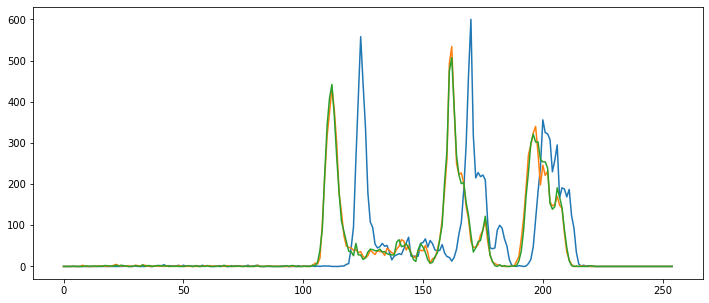

In [ ]:
hist_r = cv2.calcHist(images=image,channels=[0],mask=None,histSize=[255], ranges=[0,255])
hist_g = cv2.calcHist(images=image,channels=[1],mask=None,histSize=[255], ranges=[0,255])
hist_b = cv2.calcHist(images=image,channels=[2],mask=None,histSize=[255], ranges=[0,255])

plt.figure(figsize=(12,5))
for i in [hist_r, hist_g, hist_b]:

  plt.plot(i)

The above plot shows the distribution of intensinty values, and as you can compare with the histograms we got before, it is pretty clear that most pixels falls between 100 and 200. 


Image histograms shows the distribution of the pixels in the image. What if we wanted to increase the contrast of the image? This is where histogram equalization comes into picture. 

With [histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization), we can brighten some dark values and darken some light values or allow the areas of lower local contrast to gain a higher contrast. 

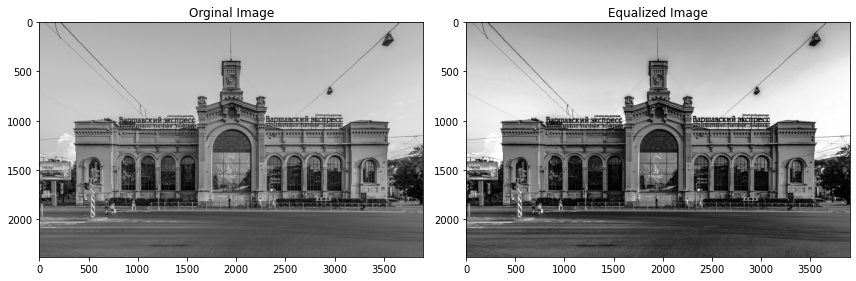

In [ ]:
# cv2.equalizeHist only accept gray image 

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

equalized_image = cv2.equalizeHist(gray_image)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Orginal Image")
plt.imshow(gray_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.tight_layout()

If we plot the pixel distribution, you can see that the pixels are well balanced now. In other words, we improved the overall contrast of the image by darkening bright and ligting darker pixels. 

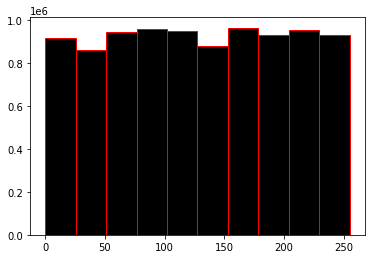

In [ ]:
plt.hist(equalized_image.ravel(), ec='red', fc='black');

This is the end of the image processing notebook. We have learned alot of things, from image color spaces, color adjustments, geometric transformation, convolution and image kernels, drawing on the image, and image histograms.

### [BACK TO TOP](#0)